In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import scipy.cluster.hierarchy as hcd
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

Data Processing class

In [0]:
class Data_Process:
  ''' used to create train and test dataframe'''
  def __init__(self, filename):
        self.df = self._load_data(filename)
  
  def _load_data(self, filename):
        ''' used to load the dataframe'''
        return pd.read_csv(filename)
    
  def dataset_information(self, filename, df):
        '''prints main information of the dataframe'''
        print('\n{0:*^80}'.format(' Reading from the file {0} '.format(filename)))
        print("\nit has {0} rows and {1} columns".format(*df.shape))
        print('\n{0:*^80}\n'.format(' It has the following columns '))
        print(df.columns)
        print('\n{0:*^80}\n'.format(' Description of quantitative columns'))
        print(df.describe(include=[np.number]))

  def clean_data(self, df, columns_to_drop):
        '''removes columns from the dataframe'''
        df = df.drop(columns_to_drop, axis=1)
        return df

  def standard_scaler(self, df):
        '''scale the dataframe using standard scalar'''
        scaled = StandardScaler().fit_transform(df)
        df_scaled = pd.DataFrame(scaled, columns=df.columns)
        return df_scaled
  

Class for clustering data

In [0]:
class Data_clustering:
    def k_means_clustering(self, df, number_clusters):
        '''predict clusters using kmeans'''
        cluster = KMeans(n_clusters=number_clusters)
        df["cluster"] = cluster.fit_predict(df[df.columns])
        return df
    
    def agglomerative_clustering(self, df, number_clusters, affinity, linkage):
        '''predict clusters using hierarchical clustering'''
        hc = AgglomerativeClustering(n_clusters=number_clusters, affinity=affinity, linkage=linkage)
        df['cluster'] = hc.fit_predict(df)
        return df
    
    def density_based_clustering(self, df, eps, metrics, minimumm_samples):
        '''predict clusters using dbscan'''
        dbscan_df = DBSCAN(eps=eps, metric=metrics, min_samples=minimum_samples).fit(df)
        df["cluster"] = dbscan_df.fit_predict(df)                                                              
        return df
    
    def hierarchical_density_based_clustering(self, df, minimum_cluster_size):
        '''predict clusters using hdbscan'''
        clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size=minimum_cluster_size)
        clusterer_hdbscan.fit(df)
        df["cluster"] = clusterer_hdbscan.fit_predict(df) 
        return df

Class for reducing dimensions of data

In [0]:
class Dimension_reduction:
    def pca_transformation(self, df_scaled, number_components):
        '''reduction of dimensions using pca'''
        pca = PCA(n_components=number_components)
        p_components = pca.fit_transform(df_scaled)
        pca_df = pd.DataFrame(data = p_components, columns = ['PC1', 'PC2'])
        ratio = pca.explained_variance_ratio_
        return pca_df, ratio
        
    def tsne_transformation(self, dataframe, number_components):
        '''reduction of dimensions using tsne'''
        tsne = TSNE(n_components=number_components).fit_transform(dataframe)
        return tsne

Class for visualizing tha data and clusters formed

In [0]:
class Visualization_class:
    def __init__(self):
        '''define parameters of styles'''
        sns.set(rc={'figure.figsize': (11.7, 6.27)})
        self.palette = "viridis"
        self.color = "darkblue"

    def plotting_elbow_curve(self, df, number):
        '''plotting elbow curve for choosing the number of clusters'''
        k_value = range(1, number)
        kmeans = [KMeans(n_clusters=i) for i in k_value]
        score = [kmeans[i].fit(df[df.columns]).score(df[df.columns]) for i in range(len(kmeans))]
        pl.plot(k_value, score)
        pl.xlabel('Number of Clusters')
        pl.ylabel('Score')
        pl.title('Elbow Curve')
        pl.show()

    def plot_pca_clusters(self, pca_df, hue):
        '''visualizing scatterplot of data after pca transformation'''
        sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'],
                        hue=hue, palette=self.palette)
        plt.xlabel('First principle component')
        plt.ylabel('Second principle component')
        plt.show()

    def plot_tsne_clusters(self, tsne_df, hue):
        '''visualizing scatterplot of data after tsne transformation'''
        sns.scatterplot(x=tsne_df[:, 0], y=tsne_df[:, 1],
                        hue=hue, palette=self.palette)
        plt.xlabel('First tsne component')
        plt.ylabel('Second tsne component')
        plt.show()

    def plot_dendrogram(self, df, metric, method):
        '''plot dendrogram to choose number of clusters'''
        plt.style.use('ggplot')
        hcd.set_link_color_palette(["#B061FF", "#7a0177"])
        hcd.dendrogram(hcd.linkage(df, metric=metric, method=method))
        plt.title('Dendrogram', size=20)
        plt.xlabel('Customers', size=15)
        plt.ylabel('Euclidean Distances', size=15)
        plt.show()

    def plotting_clusters(self, df, cluster, cluster_features):
        '''plotting interpretation of clusters'''
        #sns.set_style("whitegrid")
        bins = np.linspace(0, 1, 10)
        fig, ax = plt.subplots(1, 6, figsize=(20, 3))
        cluster_df = df[df.cluster == cluster]
        col = 0
        for feature in cluster_features:
            general = df
            cluster = cluster_df
            sns.distplot(general[feature], color='#636363', ax=ax[col])
            sns.distplot(cluster_df[feature], color='purple', ax=ax[col])

            col += 1
        plt.show()

Importing file to get the required data

In [0]:
filename = "data1996.csv"
cluster_features = ['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness', 'tempo']

Loading the data in the dataframe

In [34]:
data = Data_Process(filename)
df = data.df
df = df[cluster_features]
df.head()

,acousticness,danceability,instrumentalness,energy,speechiness,tempo
0,0.007460,0.477,0.211,0.688,0.0373,126.291
1,0.938000,0.223,0.693,0.567,0.5800,127.091
2,0.005560,0.517,0.783,0.646,0.1370,165.653
3,0.001930,0.335,0.256,0.849,0.3190,181.701
4,0.000174,0.286,0.837,0.728,0.0616,171.454


In [0]:
data = Data_Process(filename)

Making objects of the class

In [0]:
clustering = Data_clustering()
dimensions = Dimension_reduction()
plots = Visualization_class()

Tranforming the data to convert it to normal distribution form such that mean is 0 and standard deviation is 1.

In [0]:
scaled_df = data.standard_scaler(df)

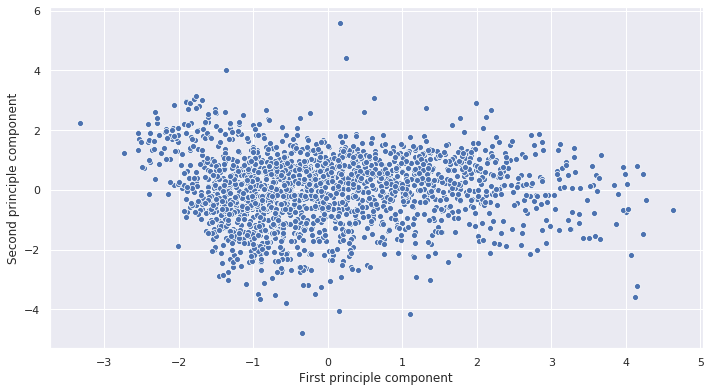

In [38]:
scaled_df_transform, ratio = dimensions.pca_transformation(scaled_df, 2)
plots.plot_pca_clusters(scaled_df_transform, None)

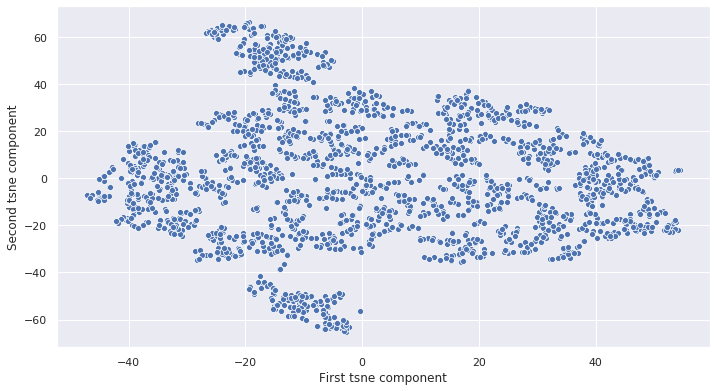

In [39]:
scaled_df_tsne = dimensions.tsne_transformation(scaled_df, 2)
plots.plot_tsne_clusters(scaled_df_tsne, None)

Plotting Elbow Curve

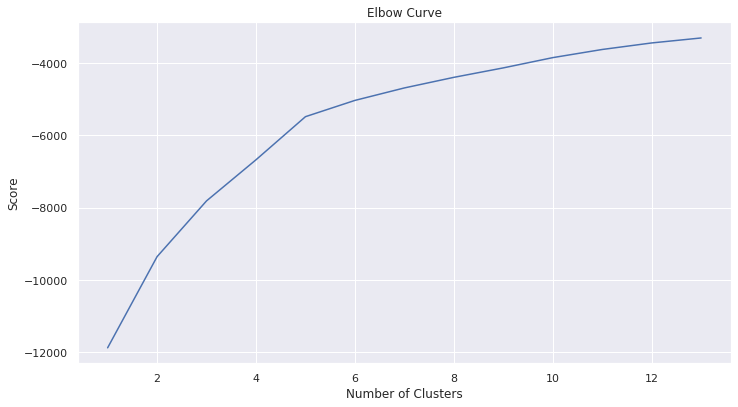

In [41]:
plots.plotting_elbow_curve(scaled_df, 14)

By looking at the graph, we find that the optimal value for k is 8.
So we will be dividing the data in 6 different clusters.

In [0]:
kmeans_df = clustering.k_means_clustering(scaled_df, 6)

Data clusters visualization using PCA

In [0]:
kmeans_df_transform, ratio = dimensions.pca_transformation(kmeans_df, 2)

In [47]:
# explained_variance_ratio
ratio

array([0.45769097, 0.17467535])

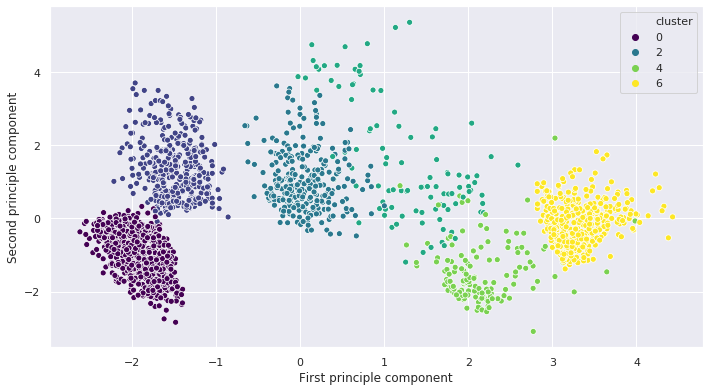

In [48]:
plots.plot_pca_clusters(kmeans_df_transform, kmeans_df['cluster'])

Data clusters visualization using TSNE

In [0]:
kmeans_tsne = dimensions.tsne_transformation(kmeans_df, 2)

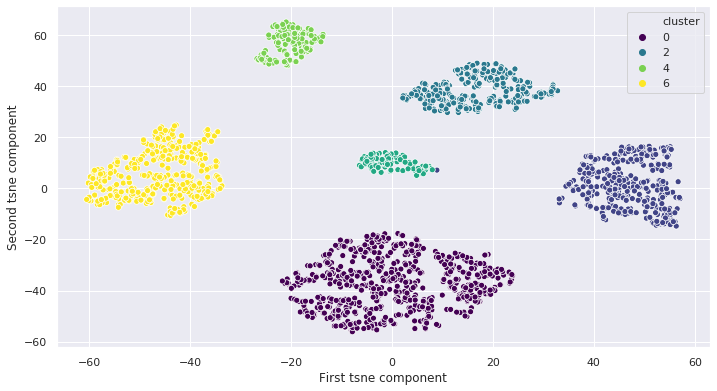

In [53]:
plots.plot_tsne_clusters(kmeans_tsne, kmeans_df['cluster'])

We plot the different features of clusters using barplot to show the distribution of the features, and compare the distribution of features in that clusters compared to other clusters.

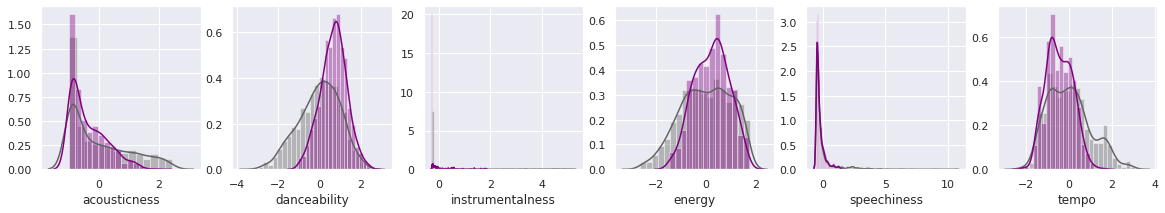

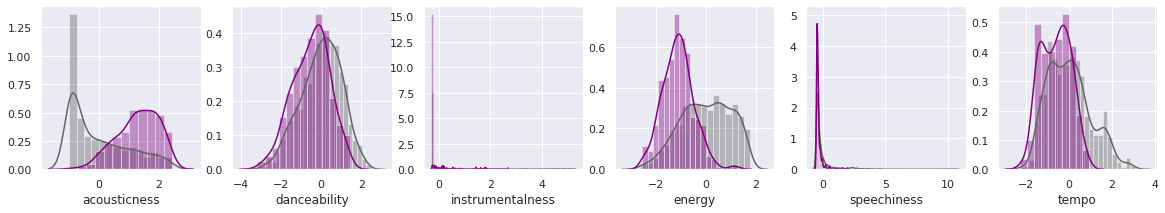

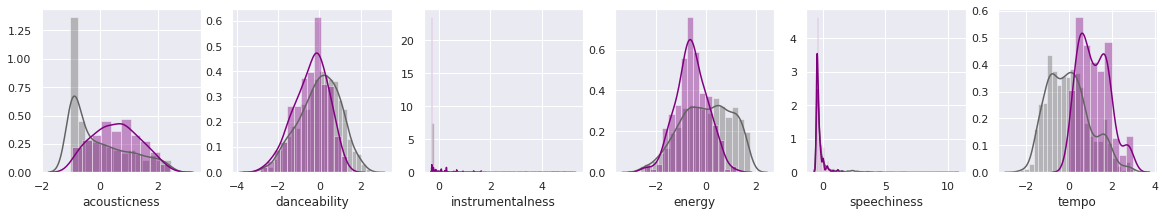

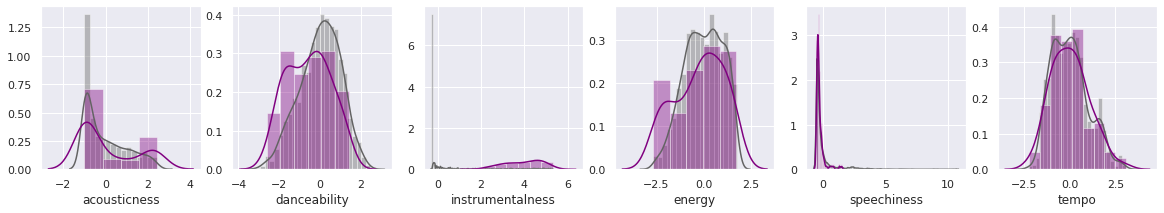

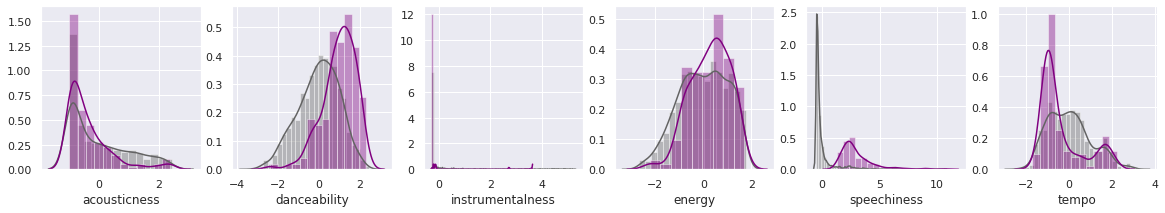

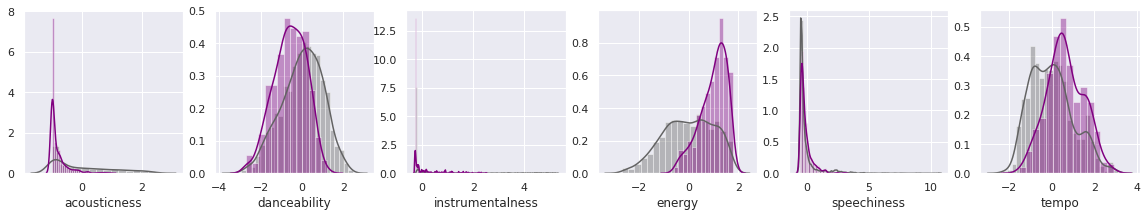

In [55]:
for i in np.sort(kmeans_df['cluster'].unique()):
    plots.plotting_clusters(kmeans_df, i, cluster_features)



Cluster 1 MID: energy; LOW: danceability

Cluster 2 HIGH: energy, danceability; MID: instrumentalness, acousticness, speechiness

Cluster 3 HIGH: acousticness; MID: danceability, instrumentalness

Cluster 4 HIGH: acousticness, tempo

Cluster 5 LOW: energy, tempo, danceability

Cluster 6 HIGH: energy, instrumentalness, speechiness, tempo; LOW: acousticness
